# Lab4-Assignment about Named Entity Recognition and Classification

This notebook describes the assignment of Lab 4 of the text mining course. We assume you have succesfully completed Lab1, Lab2 and Lab3 as welll. Especially Lab2 is important for completing this assignment.

**Learning goals**
* going from linguistic input format to representing it in a feature space
* working with pretrained word embeddings
* train a supervised classifier (SVM)
* evaluate a supervised classifier (SVM)
* learn how to interpret the system output and the evaluation results
* be able to propose future improvements based on the observed results

In [2]:
!pip freeze > requirements.txt

## Credits
This notebook was originally created by [Marten Postma](https://martenpostma.github.io) and [Filip Ilievski](http://ilievski.nl) and adapted by Piek vossen

## [Points: 18] Exercise 1 (NERC): Training and evaluating an SVM using CoNLL-2003

**[4 point] a) Load the CoNLL-2003 training data using the *ConllCorpusReader* and create for both *train.txt* and *test.txt*:**

    [2 points]  -a list of dictionaries representing the features for each training instances, e..g,
    ```
    [
    {'words': 'EU', 'pos': 'NNP'}, 
    {'words': 'rejects', 'pos': 'VBZ'},
    ...
    ]
    ```

    [2 points] -the NERC labels associated with each training instance, e.g.,
    dictionaries, e.g.,
    ```
    [
    'B-ORG', 
    'O',
    ....
    ]
    ```

In [3]:
file_dir = '/Users/mylene/ba-text-mining/lab_sessions/lab4/CONLL2003'

In [4]:
from nltk.corpus.reader import ConllCorpusReader
### Adapt the path to point to the CONLL2003 folder on your local machine
train = ConllCorpusReader(file_dir, 'train.txt', ['words', 'pos', 'ignore', 'chunk'])
training_features = []
training_gold_labels = []

for token, pos, ne_label in train.iob_words():
    a_dict = {
       # add features
        'words': token,
        'pos': pos
    }
    training_features.append(a_dict)
    training_gold_labels.append(ne_label)


In [5]:
### Adapt the path to point to the CONLL2003 folder on your local machine
test = ConllCorpusReader(file_dir, 'test.txt', ['words', 'pos', 'ignore', 'chunk'])

test_features = []
test_gold_labels = []
for token, pos, ne_label in test.iob_words():
    a_dict = {
        # add features
        'word': token,
        'pos': pos

    }
    test_features.append(a_dict)
    test_gold_labels.append(ne_label)


**[2 points] b) provide descriptive statistics about the training and test data:**
* How many instances are in train and test?
* Provide a frequency distribution of the NERC labels, i.e., how many times does each NERC label occur?
* Discuss to what extent the training and test data is balanced (equal amount of instances for each NERC label) and to what extent the training and test data differ?

Tip: you can use the following `Counter` functionality to generate frequency list of a list:

In [6]:
from collections import Counter 
# my_list=[1,2,1,3,2,5]
# Counter(my_list)
import matplotlib.pyplot as plt
train_count = Counter(training_gold_labels)
test_count = Counter(test_gold_labels)

In [7]:
keys = list(train_count.keys()) + list(test_count.keys())
values = list(train_count.values()) + list(test_count.values())

(array([ 1661., 38323.,   702.,  1617.,     0.,  1156.,  1668.,   835.,
          216.,   257.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

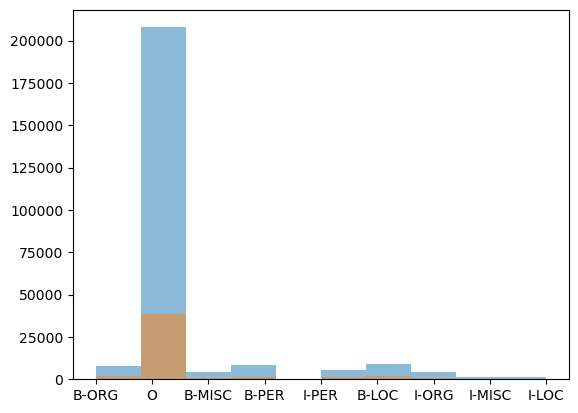

In [8]:
plt.hist(keys, weights=values, alpha=0.5, label='Train Count')
plt.hist(list(test_count.keys()), weights=list(test_count.values()), alpha=0.5, label='Test Count')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


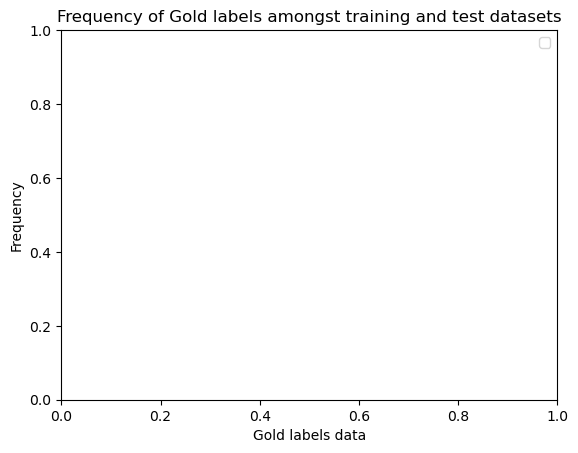

In [9]:
plt.xlabel('Gold labels data')
plt.ylabel('Frequency')
plt.title('Frequency of Gold labels amongst training and test datasets')

# Create a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

**[2 points] c) Concatenate the train and test features (the list of dictionaries) into one list. Load it using the *DictVectorizer*. Afterwards, split it back to training and test.**

Tip: You’ve concatenated train and test into one list and then you’ve applied the DictVectorizer.
The order of the rows is maintained. You can hence use an index (number of training instances) to split the_array back into train and test. Do NOT use: `
from sklearn.model_selection import train_test_split` here.


In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
vec = DictVectorizer()
features_combined = training_features + test_features
train_and_test = vec.fit_transform(features_combined).toarray()

NameError: name 'training_features' is not defined

In [29]:
train_input = train_and_test[:len(training_features)]
test_input = train_and_test[len(training_features):]

**[4 points] d) Train the SVM using the train features and labels and evaluate on the test data. Provide a classification report (sklearn.metrics.classification_report).**
The train (*lin_clf.fit*) might take a while. On my computer, it took 1min 53s, which is acceptable. Training models normally takes much longer. If it takes more than 5 minutes, you can use a subset for training. Describe the results:
* Which NERC labels does the classifier perform well on? Why do you think this is the case?
* Which NERC labels does the classifier perform poorly on? Why do you think this is the case?

In [23]:
from sklearn import svm

In [24]:
lin_clf = svm.LinearSVC()

In [25]:
##### [ YOUR CODE SHOULD GO HERE ]
lin_clf.fit(train_input, training_gold_labels)

LinearSVC()

In [30]:
test_pred = lin_clf.predict(test_input)

In [31]:
from sklearn.metrics import classification_report
report = classification_report(test_gold_labels, test_pred)
print(report)

/Users/mylene/opt/anaconda3/envs/Text-Mining/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mylene/opt/anaconda3/envs/Text-Mining/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-LOC       0.00      0.00      0.00      1668
      B-MISC       0.03      0.00      0.01       702
       B-ORG       0.00      0.00      0.00      1661
       B-PER       0.00      0.00      0.00      1617
       I-LOC       0.00      0.00      0.00       257
      I-MISC       0.00      0.00      0.00       216
       I-ORG       0.00      0.00      0.00       835
       I-PER       0.13      0.97      0.23      1156
           O       0.97      0.95      0.96     38323

    accuracy                           0.81     46435
   macro avg       0.13      0.21      0.13     46435
weighted avg       0.80      0.81      0.80     46435



/Users/mylene/opt/anaconda3/envs/Text-Mining/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**[6 points] e) Train a model that uses the embeddings of these words as inputs. Test again on the same data as in 2d. Generate a classification report and compare the results with the classifier you built in 2d.**

In [1]:
# your code here
import numpy as np
vec_2 = DictVectorizer()
train_onehot = train_input
features_training_input=np.array(train_onehot)
embeddings_training_input=np.array(train_input)

NameError: name 'DictVectorizer' is not defined

## [Points: 10] Exercise 2 (NERC): feature inspection using the [Annotated Corpus for Named Entity Recognition](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)
**[6 points] a. Perform the same steps as in the previous exercise. Make sure you end up for both the training part (*df_train*) and the test part (*df_test*) with:**
* the features representation using **DictVectorizer**
* the NERC labels in a list

Please note that this is the same setup as in the previous exercise:
* load both train and test using:
    * list of dictionaries for features
    * list of NERC labels
* combine train and test features in a list and represent them using one hot encoding
* train using the training features and NERC labels

In [17]:
import pandas

In [32]:
##### Adapt the path to point to your local copy of NERC_datasets
path = '/Users/mylene/ba-text-mining/lab_sessions/lab4/kaggle/ner_v2.csv'
kaggle_dataset = pandas.read_csv(path, error_bad_lines=False)

/var/folders/qk/lcnvt9x13sd1_944mzdqthnh0000gn/T/ipykernel_7941/4083227714.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  kaggle_dataset = pandas.read_csv(path, error_bad_lines=False)
Skipping line 281837: expected 25 fields, saw 34



In [ ]:
len(kaggle_dataset)

In [ ]:
df_train = kaggle_dataset[:100000]
df_test = kaggle_dataset[100000:120000]
print(len(df_train), len(df_test))

**[4 points] b. Train and evaluate the model and provide the classification report:**
* use the SVM to predict NERC labels on the test data
* evaluate the performance of the SVM on the test data

Analyze the performance per NERC label.

## End of this notebook